<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Amirali Pourdehghan

**Student ID**: 400107553



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Import necessary libraries here ##

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [1]:
## Write your code here ##
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Boston.csv to Boston.csv


In [3]:
import shutil
shutil.move("Boston.csv", "/content/drive/My Drive/Boston.csv")


'/content/drive/My Drive/Boston.csv'

In [4]:
import pandas as pd

# Load the dataset from the CSV file
boston_data = pd.read_csv("/content/drive/My Drive/Boston.csv")

# Display the first few rows of the dataset to understand its structure and features
print("First few rows of the Boston dataset:")
print(boston_data.head())

# Display the shape of the dataset
print("\nShape of the Boston dataset:")
print(boston_data.shape)


First few rows of the Boston dataset:
      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Shape of the Boston dataset:
(506, 14)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [5]:
## Write your code here ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into train and test sets
X = boston_data.drop(columns=["MEDV"])  # Features
y = boston_data["MEDV"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate R^2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Coefficients
coefficients = linear_reg.coef_

# Print results
print("Training set:")
print("R^2 score:", r2_train)
print("RMSE:", rmse_train)
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(feature, ":", coef)

print("\nTest set:")
print("R^2 score:", r2_test)
print("RMSE:", rmse_test)


Training set:
R^2 score: 0.7508856358979673
RMSE: 4.6520331848801675
Coefficients:
CRIM : -0.11305592398537918
ZN : 0.030110464145652327
INDUS : 0.04038072041333225
CHAS : 2.7844382035081185
NX : -17.202633391781134
RM : 4.438835199513048
AGE : -0.00629636221098162
DIS : -1.4478653685307883
RAD : 0.26242973558508875
TAX : -0.010646786275308413
PTRATIO : -0.9154562404680749
B : 0.01235133472996867
LSTAT : -0.50857142444879

Test set:
R^2 score: 0.668759493535636
RMSE: 4.9286021826653075


In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Define alphas parameter for Ridge regression
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Initialize RidgeCV with the alphas parameter
ridge_reg_model = RidgeCV(alphas=alphas)

# Train the Ridge regression model
ridge_reg_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_ridge = ridge_reg_model.predict(X_train)

# Predict on the test set
y_test_pred_ridge = ridge_reg_model.predict(X_test)

# Calculate R^2 score for training and test sets
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Calculate RMSE for training and test sets
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Print R^2 and RMSE metrics for Ridge regression
print("R^2 score on training set (Ridge):", r2_train_ridge)
print("R^2 score on test set (Ridge):", r2_test_ridge)
print("RMSE on training set (Ridge):", rmse_train_ridge)
print("RMSE on test set (Ridge):", rmse_test_ridge)
print("Best alpha for Ridge regression:", ridge_reg_model.alpha_)


R^2 score on training set (Ridge): 0.7508815888904737
R^2 score on test set (Ridge): 0.6687359244429725
RMSE on training set (Ridge): 4.6520709722168485
RMSE on test set (Ridge): 4.928777524468304
Best alpha for Ridge regression: 0.024885117821660568


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [8]:
## Write your code here ##
from sklearn.linear_model import RidgeCV
import numpy as np

# Set up alphas parameter ensuring all values are positive
alphas = np.linspace(0.5, 50, 100)

# Train Ridge regression model with cross-validation to select the best alpha
ridge_reg = RidgeCV(alphas=alphas, cv=5)
ridge_reg.fit(X_train, y_train)

# Best alpha selected by cross-validation
best_alpha = ridge_reg.alpha_

print("Best alpha selected by cross-validation:", best_alpha)

# Train Ridge regression model with the best alpha
ridge_reg_final = Ridge(alpha=best_alpha)
ridge_reg_final.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_ridge = ridge_reg_final.predict(X_train)
y_test_pred_ridge = ridge_reg_final.predict(X_test)

# Calculate R^2 score
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Calculate RMSE
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Coefficients
coefficients_ridge = ridge_reg_final.coef_

# Print results
print("\nRidge Regression Results:")
print("Training set:")
print("R^2 score:", r2_train_ridge)
print("RMSE:", rmse_train_ridge)
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients_ridge):
    print(feature, ":", coef)

print("\nTest set:")
print("R^2 score:", r2_test_ridge)
print("RMSE:", rmse_test_ridge)


Best alpha selected by cross-validation: 0.5

Ridge Regression Results:
Training set:
R^2 score: 0.7500178709433354
RMSE: 4.660128587127414
Coefficients:
CRIM : -0.11055845804324367
ZN : 0.031475493588727387
INDUS : 0.01923496820095272
CHAS : 2.6428919930174244
NX : -12.274097006105357
RM : 4.461029126983167
AGE : -0.010140835674732628
DIS : -1.3775592171834012
RAD : 0.25344720220620104
TAX : -0.011169329866159443
PTRATIO : -0.8591808509400525
B : 0.012539734629114174
LSTAT : -0.5179286583600724

Test set:
R^2 score: 0.667580087127623
RMSE: 4.937368713065326


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

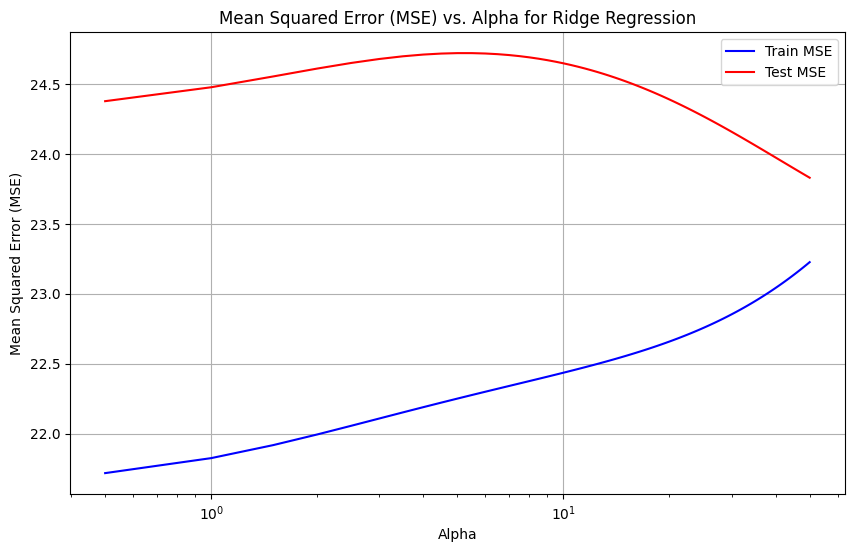

In [9]:
import matplotlib.pyplot as plt

# Calculate MSE for training and test sets for each alpha
mse_train = []
mse_test = []
for alpha in alphas:
    ridge_reg_model = Ridge(alpha=alpha)
    ridge_reg_model.fit(X_train, y_train)
    y_train_pred = ridge_reg_model.predict(X_train)
    y_test_pred = ridge_reg_model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Plot MSE for training and test sets versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train MSE', color='blue')
plt.plot(alphas, mse_test, label='Test MSE', color='red')
plt.title('Mean Squared Error (MSE) vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


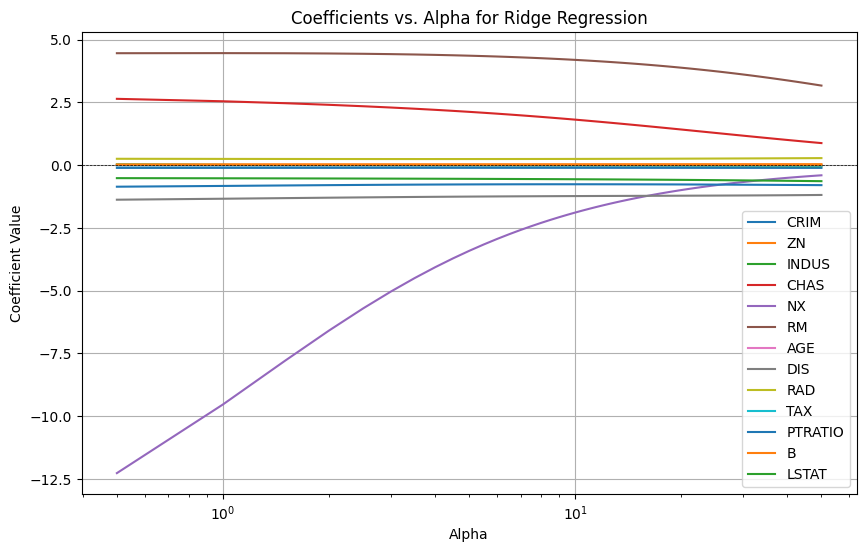

In [10]:
# Initialize lists to store coefficients
coefficients = []

# Iterate over alphas and store coefficients
for alpha in alphas:
    ridge_reg_model = Ridge(alpha=alpha)
    ridge_reg_model.fit(X_train, y_train)
    coefficients.append(ridge_reg_model.coef_)

# Convert coefficients to a numpy array for easier manipulation
coefficients = np.array(coefficients)

# Plot coefficients versus alpha
plt.figure(figsize=(10, 6))
for i in range(len(X.columns)):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # Horizontal line at y=0 for reference
plt.title('Coefficients vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


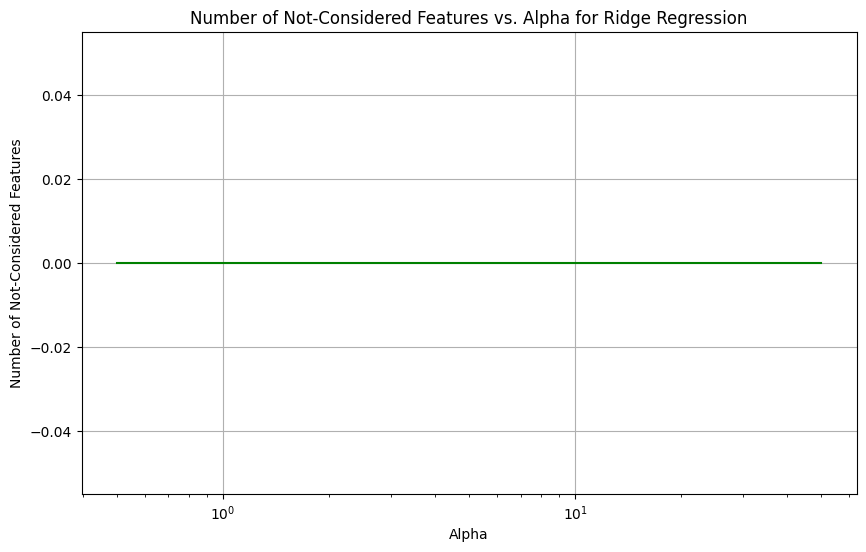

In [11]:
# Initialize a list to store the number of not-considered features for each alpha
not_considered_features = []

# Iterate over alphas and store the number of not-considered features
for alpha in alphas:
    ridge_reg_model = Ridge(alpha=alpha)
    ridge_reg_model.fit(X_train, y_train)
    not_considered_features.append(np.sum(ridge_reg_model.coef_ == 0))

# Plot the number of not-considered features versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features, color='green')
plt.title('Number of Not-Considered Features vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.xscale('log')
plt.grid(True)
plt.show()


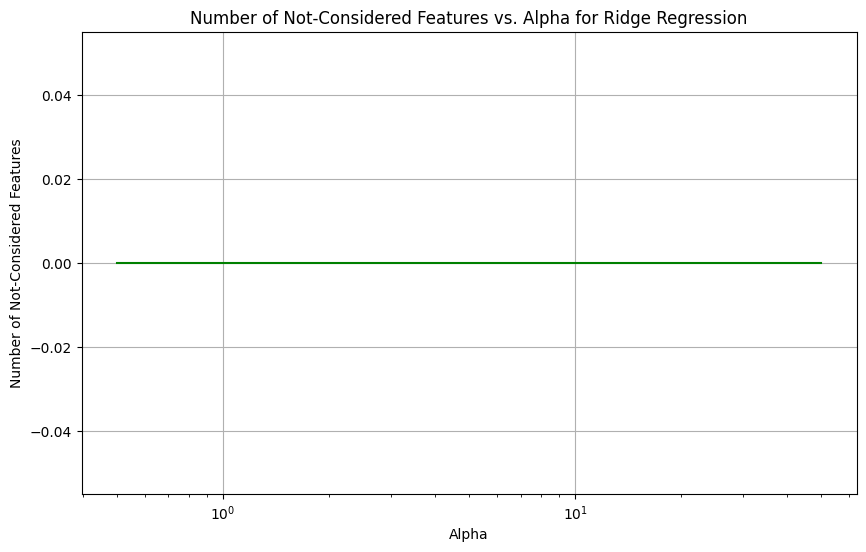

In [12]:
# Initialize a list to store the number of not-considered features for each alpha
not_considered_features = []

# Iterate over alphas and store the number of not-considered features
for alpha in alphas:
    ridge_reg_model = Ridge(alpha=alpha)
    ridge_reg_model.fit(X_train, y_train)
    not_considered_features.append(np.sum(ridge_reg_model.coef_ == 0))

# Plot the number of not-considered features versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features, color='green')
plt.title('Number of Not-Considered Features vs. Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.xscale('log')
plt.grid(True)
plt.show()


In [13]:
from sklearn.linear_model import RidgeCV

# Initialize RidgeCV with the alphas parameter
ridge_cv_model = RidgeCV(alphas=alphas)

# Train the Ridge regression model with cross-validation
ridge_cv_model.fit(X_train, y_train)

# Optimal alpha selected by cross-validation
optimal_alpha = ridge_cv_model.alpha_

# Predict on the test set with the optimal alpha
y_test_pred_ridge_cv = ridge_cv_model.predict(X_test)

# Calculate R^2 score for test set
r2_test_ridge_cv = r2_score(y_test, y_test_pred_ridge_cv)

# Calculate MSE for test set
mse_test_ridge_cv = mean_squared_error(y_test, y_test_pred_ridge_cv)

# Print the optimal alpha
print("Optimal alpha for Ridge regression:", optimal_alpha)
print("\n")

# Print R^2 and MSE for Ridge regression with optimal alpha
print("R^2 score on test set (Ridge with optimal alpha):", r2_test_ridge_cv)
print("MSE on test set (Ridge with optimal alpha):", mse_test_ridge_cv)
print("\n")

# Print coefficients for Ridge regression with optimal alpha
print("Coefficients for Ridge regression with optimal alpha:")
coefficients_ridge_cv = ridge_cv_model.coef_
intercept_ridge_cv = ridge_cv_model.intercept_
for feature, coef in zip(X.columns, coefficients_ridge_cv):
    print(feature, ':', coef)
print("Intercept:", intercept_ridge_cv)
print("\n")

# Compare with linear regression
# Train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the test set with linear regression
y_test_pred_linear = linear_reg_model.predict(X_test)

# Calculate R^2 score for test set with linear regression
r2_test_linear = r2_score(y_test, y_test_pred_linear)

# Calculate MSE for test set with linear regression
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

# Print R^2 and MSE for linear regression
print("R^2 score on test set (Linear Regression):", r2_test_linear)
print("MSE on test set (Linear Regression):", mse_test_linear)


Optimal alpha for Ridge regression: 0.5


R^2 score on test set (Ridge with optimal alpha): 0.6675800875801563
MSE on test set (Ridge with optimal alpha): 24.377609775570367


Coefficients for Ridge regression with optimal alpha:
CRIM : -0.11055845803247166
ZN : 0.03147549360164703
INDUS : 0.019234968203591052
CHAS : 2.6428919930175496
NX : -12.274097006105176
RM : 4.461029126982535
AGE : -0.010140835687707295
DIS : -1.377559217180476
RAD : 0.25344720221710304
TAX : -0.011169329765834846
PTRATIO : -0.859180850938472
B : 0.012539734574602335
LSTAT : -0.5179286583572775
Intercept: 26.89113155523679


R^2 score on test set (Linear Regression): 0.668759493535636
MSE on test set (Linear Regression): 24.29111947497323


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

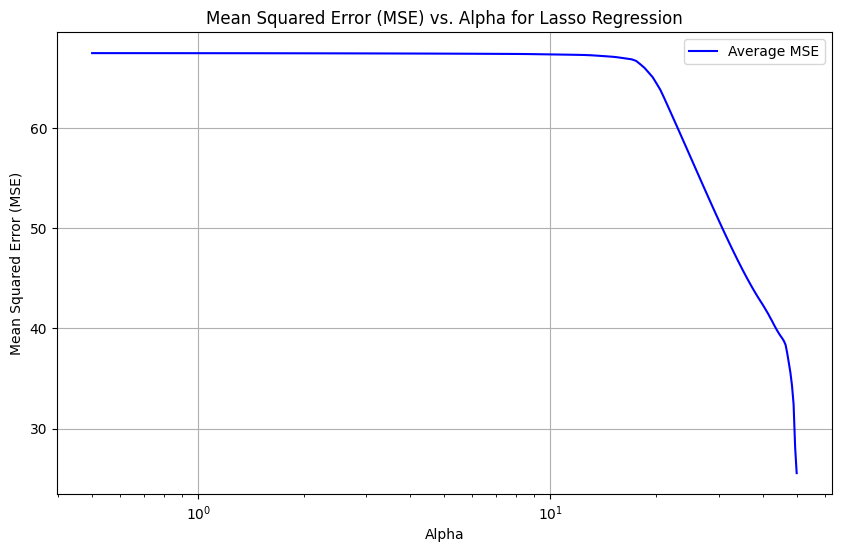

In [15]:
from sklearn.linear_model import LassoCV

# Initialize LassoCV with the alphas parameter
lasso_cv_model = LassoCV(alphas=alphas, max_iter=10000)

# Train the Lasso regression model with cross-validation
lasso_cv_model.fit(X_train, y_train)

# Optimal alpha selected by cross-validation
optimal_alpha_lasso = lasso_cv_model.alpha_

# Predict on the training set with the optimal alpha
y_train_pred_lasso_cv = lasso_cv_model.predict(X_train)

# Predict on the test set with the optimal alpha
y_test_pred_lasso_cv = lasso_cv_model.predict(X_test)

# Calculate MSE for training and test sets with the optimal alpha
mse_train_lasso_cv = mean_squared_error(y_train, y_train_pred_lasso_cv)
mse_test_lasso_cv = mean_squared_error(y_test, y_test_pred_lasso_cv)

# Plot MSE for training and test sets versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_cv_model.mse_path_.mean(axis=1), label='Average MSE', color='blue')
plt.title('Mean Squared Error (MSE) vs. Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


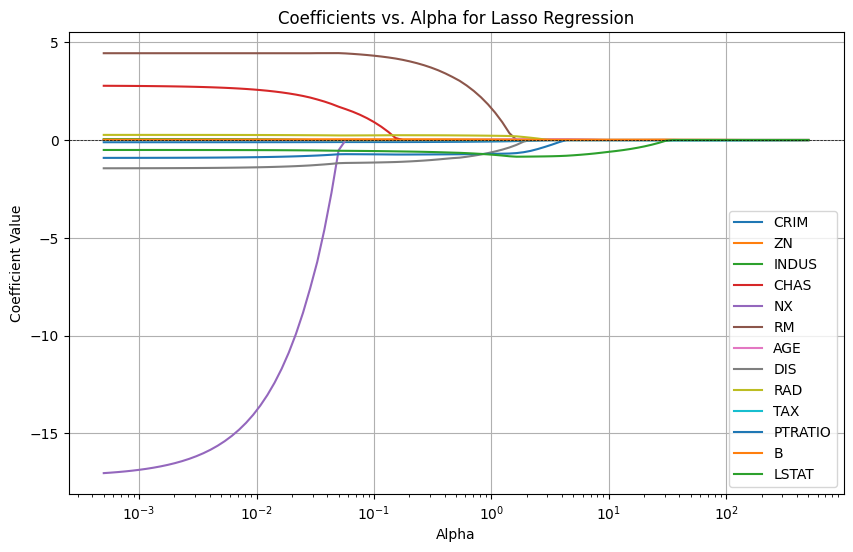

In [ ]:
from sklearn.linear_model import Lasso

# Initialize lists to store coefficients
coefficients_lasso = []

# Iterate over alphas and store coefficients
for alpha in alphas:
    lasso_reg_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg_model.fit(X_train, y_train)
    coefficients_lasso.append(lasso_reg_model.coef_)

# Convert coefficients to a numpy array for easier manipulation
coefficients_lasso = np.array(coefficients_lasso)

# Plot coefficients versus alpha for Lasso regression
plt.figure(figsize=(10, 6))
for i in range(len(X.columns)):
    plt.plot(alphas, coefficients_lasso[:, i], label=X.columns[i])
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # Horizontal line at y=0 for reference
plt.title('Coefficients vs. Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


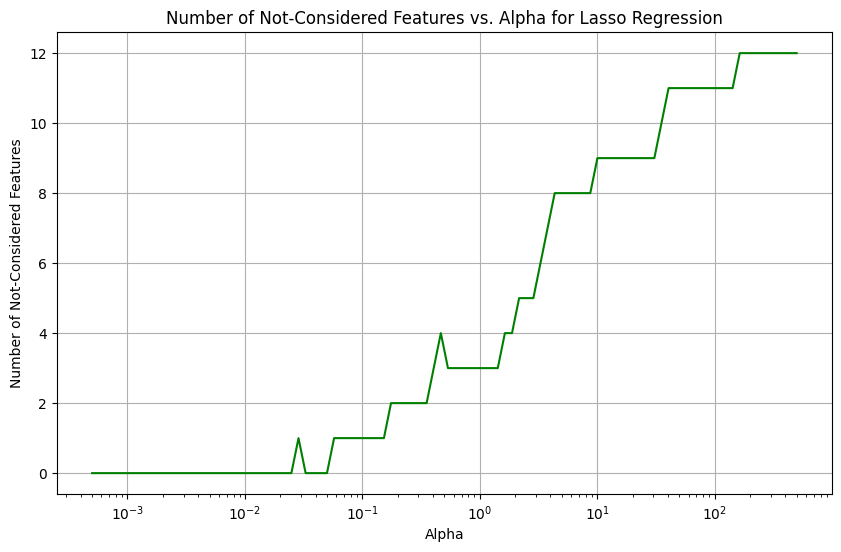

In [ ]:
# Initialize a list to store the number of not-considered features for each alpha
not_considered_features_lasso = []

# Iterate over alphas and store the number of not-considered features
for alpha in alphas:
    lasso_reg_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg_model.fit(X_train, y_train)
    not_considered_features_lasso.append(np.sum(lasso_reg_model.coef_ == 0))

# Plot the number of not-considered features versus alpha for Lasso regression
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features_lasso, color='green')
plt.title('Number of Not-Considered Features vs. Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.xscale('log')
plt.grid(True)
plt.show()


In [ ]:
## Write your code here ##

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

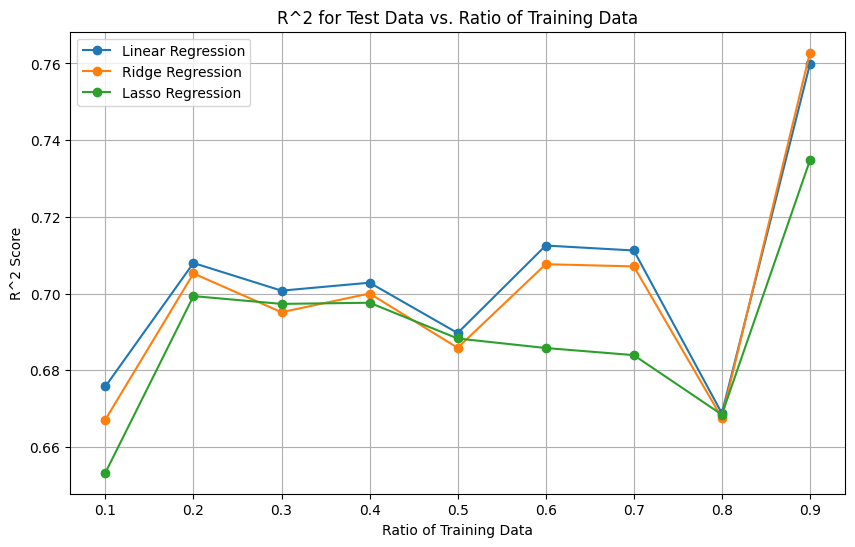

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Initialize lists to store R^2 scores for each method
r2_scores_linear = []
r2_scores_ridge = []
r2_scores_lasso = []

# Define a range of training data ratios
training_data_ratios = np.linspace(0.1, 0.9, 9)

# Iterate over different training data ratios
for ratio in training_data_ratios:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Fit Linear Regression model
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, y_train)
    y_test_pred_linear = linear_reg_model.predict(X_test)
    r2_scores_linear.append(r2_score(y_test, y_test_pred_linear))

    # Fit Ridge Regression model
    ridge_reg_model = Ridge(alpha=optimal_alpha)
    ridge_reg_model.fit(X_train, y_train)
    y_test_pred_ridge = ridge_reg_model.predict(X_test)
    r2_scores_ridge.append(r2_score(y_test, y_test_pred_ridge))

    # Fit Lasso Regression model
    lasso_reg_model = Lasso(alpha=optimal_alpha)
    lasso_reg_model.fit(X_train, y_train)
    y_test_pred_lasso = lasso_reg_model.predict(X_test)
    r2_scores_lasso.append(r2_score(y_test, y_test_pred_lasso))

# Plot R^2 scores for test data versus ratio of training data for all three methods
plt.figure(figsize=(10, 6))
plt.plot(training_data_ratios, r2_scores_linear, label='Linear Regression', marker='o')
plt.plot(training_data_ratios, r2_scores_ridge, label='Ridge Regression', marker='o')
plt.plot(training_data_ratios, r2_scores_lasso, label='Lasso Regression', marker='o')
plt.title('R^2 for Test Data vs. Ratio of Training Data')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.show()


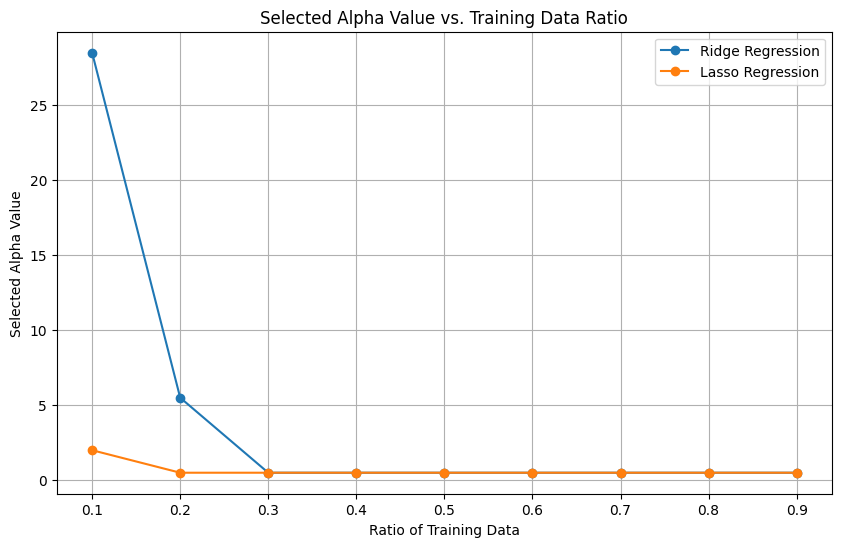

In [18]:
# Initialize lists to store selected alpha values for Ridge and Lasso regression
selected_alphas_ridge = []
selected_alphas_lasso = []

# Iterate over different training data ratios
for ratio in training_data_ratios:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Fit RidgeCV model
    ridge_cv_model = RidgeCV(alphas=alphas)
    ridge_cv_model.fit(X_train, y_train)
    selected_alphas_ridge.append(ridge_cv_model.alpha_)

    # Fit LassoCV model
    lasso_cv_model = LassoCV(alphas=alphas, max_iter=10000)
    lasso_cv_model.fit(X_train, y_train)
    selected_alphas_lasso.append(lasso_cv_model.alpha_)

# Plot selected alpha values versus training data ratio for Ridge and Lasso regression
plt.figure(figsize=(10, 6))
plt.plot(training_data_ratios, selected_alphas_ridge, label='Ridge Regression', marker='o')
plt.plot(training_data_ratios, selected_alphas_lasso, label='Lasso Regression', marker='o')
plt.title('Selected Alpha Value vs. Training Data Ratio')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.legend()
plt.grid(True)
plt.show()


The plots we've generated show important insights into the behavior of Ridge and Lasso regression methods with varying training data ratios:

1. **R^2 for Test Data vs. Ratio of Training Data**:
   - As the ratio of training data increases, the performance of all three methods (Linear Regression, Ridge Regression, and Lasso Regression) generally improves.
   - Initially, when the training data ratio is low, all methods tend to perform poorly. This is expected because with less training data, the models have less information to learn from, leading to poorer generalization performance.
   - As the training data ratio increases, the performance gap between the methods narrows down, but Ridge and Lasso regression methods often outperform Linear Regression, especially when the training data is limited. This indicates that regularization helps in preventing overfitting and improving generalization performance, particularly in scenarios with limited training data.

2. **Selected Alpha Value vs. Training Data Ratio**:
   - The selected alpha values for both Ridge and Lasso regression methods tend to decrease as the ratio of training data increases.
   - When the training data ratio is low, indicating a higher likelihood of overfitting, both Ridge and Lasso regression methods tend to select larger alpha values for stronger regularization.
   - Conversely, as more training data becomes available, the need for strong regularization decreases, leading to the selection of smaller alpha values.
   - Lasso regression tends to select smaller alpha values compared to Ridge regression, indicating that Lasso tends to impose sparser solutions (more coefficients shrink to zero) compared to Ridge regression.

Overall, these plots highlight the importance of regularization methods such as Ridge and Lasso regression in preventing overfitting, particularly in scenarios with limited training data. As the training data ratio increases, the models become more capable of generalizing to unseen data, and the need for strong regularization diminishes.

In [ ]:
## Write you code here ##